<a href="https://colab.research.google.com/github/dfirm/iads_day6/blob/main/lecture3_notebook_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3 notebook
## Introduction to TensorFlow and Deep Learning

## IADS Summer School, 2nd August 2021

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is a Jupyter Notebook to accompany Lecture 3 of the course

### Load the Iris Dataset


In [1]:
import pandas as pd

#Load CSV files
#inputs_train=pd.read_csv('datasets/iris_train.csv',usecols = [0,1,2,3],skiprows = None,header=None).values
#labels_train = pd.read_csv('datasets/iris_train.csv',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
#inputs_test=pd.read_csv('datasets/iris_test.csv',usecols = [0,1,2,3],skiprows = None,header=None).values
#labels_test = pd.read_csv('datasets/iris_test.csv',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
# If the above line fails then try instead the following 4 lines, to download it directly from 
# my google drive account
inputs_train=pd.read_csv('https://drive.google.com/uc?export=download&id=15g37AN8yaPJtuQwOnhuNuMIWcMr8vB9C',usecols = [0,1,2,3],skiprows = None,header=None).values
labels_train = pd.read_csv('https://drive.google.com/uc?export=download&id=15g37AN8yaPJtuQwOnhuNuMIWcMr8vB9C',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
inputs_test=pd.read_csv('https://drive.google.com/uc?export=download&id=1a7ok2PiILjhzrB3cUWmXvBmHY-cpZ6lc',usecols = [0,1,2,3],skiprows = None,header=None).values
labels_test = pd.read_csv('https://drive.google.com/uc?export=download&id=1a7ok2PiILjhzrB3cUWmXvBmHY-cpZ6lc',usecols = [4],skiprows = None ,header=None).values.reshape(-1)


print("Data loaded")
print("Train set inputs:",inputs_train)
print("Train set labels:",labels_train)
print("Test set inputs:",inputs_test)
print("Test set labels:",labels_test)


Data loaded
Train set inputs: [[6.4 2.8 5.6 2.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [4.9 3.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]
 [4.4 3.2 1.3 0.2]
 [5.4 3.4 1.5 0.4]
 [6.9 3.1 5.1 2.3]
 [6.7 3.1 4.4 1.4]
 [5.1 3.7 1.5 0.4]
 [5.2 2.7 3.9 1.4]
 [6.9 3.1 4.9 1.5]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.7 0.4]
 [7.7 3.8 6.7 2.2]
 [6.3 3.3 4.7 1.6]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [6.4 3.2 5.3 2.3]
 [5.7 4.4 1.5 0.4]
 [6.7 3.3 5.7 2.1]
 [6.4 2.8 5.6 2.1]
 [5.4 3.9 1.3 0.4]
 [6.1 2.6 5.6 1.4]
 [7.2 3.  5.8 1.6]
 [5.2 3.5 1.5 0.2]
 [5.8 2.6 4.  1.2]
 [5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [6.3 2.3 4.4 1.3]
 [5.1 2.5 3.  1.1]
 [6.4 3.2 4.5 1.5]
 [6.8 3.  5.5 2.1]
 [6.2 2.8 4.8 1.8]
 [6.9 3.2 5.7 2.3]
 [6.5 3.2 5.1 2. ]
 [5.8 2.8 5.1 2.4]
 [5.1 3.8 1.5 0.3]
 [4.8 3.  1.4 0.3]
 [7.9 3.8 6.4 2. ]
 [5.8 2.7 5.1 1.9]
 [6.7 3.  5.2 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.  2.2 5.  1.5]
 [4.8 3.4 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [4.6 3.6 1.  0.2]
 [7.2 3.2 6.  1.8]
 [5.  3.3 1.4 0.2]
 

#### Build the neural network

In [2]:
import tensorflow as tf

#Neural network
hids=[4,20,20,3]
layer1=tf.keras.layers.Dense(hids[1], activation='tanh')
layer2=tf.keras.layers.Dense(hids[2], activation='tanh')
layer3=tf.keras.layers.Dense(hids[3], activation='softmax')
model = tf.keras.Sequential([layer1,layer2,layer3])

def run_network(x,training=False):
    return model(x,training=training)

print(run_network(inputs_train[0:1,:])) # we have to run the network once before the trainable_variables are created
print(model.summary()) # Prints an overview of a keras model

tf.Tensor([[0.186428   0.5112821  0.30228996]], shape=(1, 3), dtype=float32)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 20)                   100       
_________________________________________________________________
dense_1 (Dense)              (1, 20)                   420       
_________________________________________________________________
dense_2 (Dense)              (1, 3)                    63        
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________
None


#### Train the neural network

In [8]:
@tf.function
def calc_loss_and_accuracy(inputs, labels, training):
    y=run_network(inputs,training)
    cce=tf.keras.losses.SparseCategoricalCrossentropy()
    cross_entropy = tf.reduce_mean(cce(y_true=labels, y_pred=y))
    total_loss=cross_entropy
    correct_predictions = tf.equal(tf.argmax(y, axis=1), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    k_L2=0.005
    lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in trainable_variables ]) 
    total_loss+=lossL2*k_L2
    return [total_loss, accuracy, cross_entropy]

@tf.function
def calc_training_loss():
    return calc_loss_and_accuracy(inputs_train, labels_train, training=True)[0]
trainable_variables=model.trainable_variables

training_losses=[]
test_losses=[]
iterations=[]

In [9]:
optimizer = tf.keras.optimizers.Adam()
for i in range(10000):
    optimizer.minimize(calc_training_loss, trainable_variables)
    if (i%100)==0:
        [train_loss, train_acc, train_cross_entropy]=calc_loss_and_accuracy(inputs_train, labels_train,training=False)
        [test_loss, test_acc, test_cross_entropy]=calc_loss_and_accuracy(inputs_test, labels_test,training=False)
        iterations.append(i)
        training_losses.append(train_cross_entropy)
        test_losses.append(test_cross_entropy)
        print("iteration ",i," loss:", train_loss.numpy()," accuracy:", train_acc.numpy(), "testLoss:",test_loss.numpy(), "test_accuracy:", test_acc.numpy())

iteration  0  loss: 0.8636562  accuracy: 1.0 testLoss: 2.0024526 test_accuracy: 0.96666664
iteration  100  loss: 0.71980506  accuracy: 1.0 testLoss: 1.7723119 test_accuracy: 0.96666664
iteration  200  loss: 0.607956  accuracy: 1.0 testLoss: 1.5505676 test_accuracy: 0.96666664
iteration  300  loss: 0.5191511  accuracy: 1.0 testLoss: 1.3289392 test_accuracy: 0.96666664
iteration  400  loss: 0.44740823  accuracy: 1.0 testLoss: 1.1222458 test_accuracy: 0.96666664
iteration  500  loss: 0.3895251  accuracy: 1.0 testLoss: 0.94517684 test_accuracy: 0.96666664
iteration  600  loss: 0.34282908  accuracy: 1.0 testLoss: 0.80092597 test_accuracy: 0.96666664
iteration  700  loss: 0.3045248  accuracy: 1.0 testLoss: 0.6795849 test_accuracy: 0.96666664
iteration  800  loss: 0.27305317  accuracy: 1.0 testLoss: 0.57830334 test_accuracy: 0.96666664
iteration  900  loss: 0.24751651  accuracy: 1.0 testLoss: 0.49642438 test_accuracy: 0.96666664
iteration  1000  loss: 0.2269239  accuracy: 1.0 testLoss: 0.4291

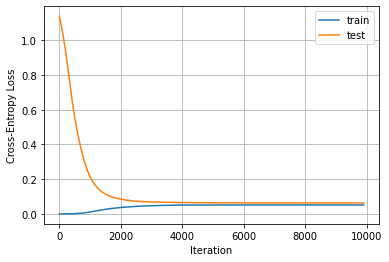

In [10]:
import matplotlib.pyplot as plt
plt.plot(iterations,training_losses,label="train")
plt.plot(iterations,test_losses,label="test")
plt.xlabel("Iteration")
plt.ylabel('Cross-Entropy Loss')
plt.grid()
plt.legend()
plt.show()

## End of lecture 3
